<a href="https://colab.research.google.com/github/francotestori/aauba_02/blob/master/Training_held_out_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
#from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns
print('Libraries Imported')

Libraries Imported


In [143]:
!wget https://raw.githubusercontent.com/francotestori/aauba_02/d9ac9be49832eaaee67f3dff431a519af4edd23d/resources/audio_digits_with_filename.csv
!wget https://raw.githubusercontent.com/francotestori/aauba_02/master/testing.csv
!wget https://raw.githubusercontent.com/francotestori/aauba_02/master/validation.csv

--2020-07-06 13:12:40--  https://raw.githubusercontent.com/francotestori/aauba_02/d9ac9be49832eaaee67f3dff431a519af4edd23d/resources/audio_digits_with_filename.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.216.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 36670903 (35M) [text/plain]
Guardando como: “audio_digits_with_filename.csv.4”

audio_digits_with_f 100%[===================>]  34,97M  2,76MB/s    en 54s     

2020-07-06 13:13:37 (664 KB/s) - “audio_digits_with_filename.csv.4” guardado [36670903/36670903]

--2020-07-06 13:13:37--  https://raw.githubusercontent.com/francotestori/aauba_02/master/testing.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.216.133]:443... conectado.
Petición HTTP enviada, esperando re

In [190]:
# Carga de archivos

df = pd.read_csv('audio_digits_with_filename.csv.4')
testing_list = pd.read_csv('testing.csv.4')
validation_list = pd.read_csv('validation.csv.4')

# Eliminamos columna 
df = df.drop(['Unnamed: 0'],axis=1)

# Creamos una columna que arregla el nombre del audio
df['audio_name'] = df['filename'].str.slice(start=15)

# Nos fijamos para cada audio a qué conjunto pertenece

tipo_split = []
for i in df['audio_name'] :
  if i in testing_list['test'].tolist():
    tipo_split.append('test')
  elif i in validation_list['validation'].tolist():
    tipo_split.append('validation') 
  else:
    tipo_split.append('training')

df['split'] = tipo_split

df['split'].value_counts()

# Armado de conjuntos

df_test = df[df['split']=='test']
df_vali = df[df['split']=='validation']
df_traini = df[df['split']=='training']

# Target
y_traini = df_traini['digit']
y_vali = df_vali['digit']
y_test = df_test['digit']

# Features
x_traini = df_train.drop(['digit','filename','audio_name','split'],axis=1)
x_vali = df_val.drop(['digit','filename','audio_name','split'],axis=1)
x_test = df_test.drop(['digit','filename','audio_name','split'],axis=1)

In [191]:
# Como no hacemos cv en nv sumo train y val
x_train = pd.concat([x_traini,x_vali])
y_train = pd.concat([y_traini,y_vali])
df_train = pd.concat([df_traini,df_vali])

In [154]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
#X_val = scaler.transform(x_vali)
X_test = scaler.transform(x_test)

In [155]:
pd.Series(y_train).unique()

array(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
       'eight', 'nine'], dtype=object)

In [156]:
for k,title in enumerate(pd.Series(y_train).unique()):
    print(f'Y >  {title}', end='\t')
    perc_train = pd.Series(y_train).value_counts(normalize=True)
    perc_test = pd.Series(y_test).value_counts(normalize=True)
    print(f'Entrenamiento:{perc_train[k]:.5}', end='\t')
    print(f'Hold-out:{perc_train[k]:.5}')

Y >  zero	Entrenamiento:0.10161	Hold-out:0.10161
Y >  one	Entrenamiento:0.1007	Hold-out:0.1007
Y >  two	Entrenamiento:0.1007	Hold-out:0.1007
Y >  three	Entrenamiento:0.10059	Hold-out:0.10059
Y >  four	Entrenamiento:0.10021	Hold-out:0.10021
Y >  five	Entrenamiento:0.10005	Hold-out:0.10005
Y >  six	Entrenamiento:0.099463	Hold-out:0.099463
Y >  seven	Entrenamiento:0.099033	Hold-out:0.099033
Y >  eight	Entrenamiento:0.098872	Hold-out:0.098872
Y >  nine	Entrenamiento:0.098765	Hold-out:0.098765


              precision    recall  f1-score   support

       eight       0.62      0.60      0.61       257
        five       0.58      0.58      0.58       271
        four       0.69      0.57      0.62       253
        nine       0.60      0.47      0.53       259
         one       0.42      0.47      0.44       248
       seven       0.54      0.50      0.52       239
         six       0.47      0.64      0.55       244
       three       0.53      0.49      0.51       267
         two       0.41      0.50      0.45       264
        zero       0.56      0.50      0.53       250

    accuracy                           0.53      2552
   macro avg       0.54      0.53      0.53      2552
weighted avg       0.54      0.53      0.53      2552



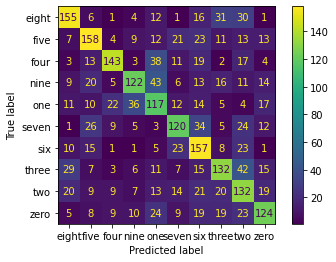

In [160]:
# Naive Bayes gaussiano
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
#predictions=gnb.predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test)
print(classification_report(y_test,y_pred))

In [161]:
# Analisis de componentes principales varianza 95%
pca = PCA(0.95)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df[['digit']].iloc[0:len(y_train)]], axis = 1)

In [162]:
finalDf['digit'].value_counts(normalize=True)

seven    0.112579
zero     0.112532
two      0.112390
four     0.112343
one      0.112248
six      0.112200
five     0.111632
three    0.111585
eight    0.102491
Name: digit, dtype: float64

In [163]:
# Proyectando x sobre el espacio de dimension reducida
train_x = pca.transform(X_train)
test_x = pca.transform(X_test)

train_x.shape,test_x.shape

((21114, 53), (2552, 53))

              precision    recall  f1-score   support

       eight       0.53      0.70      0.61       257
        five       0.68      0.64      0.66       271
        four       0.75      0.60      0.67       253
        nine       0.60      0.55      0.57       259
         one       0.48      0.58      0.52       248
       seven       0.59      0.61      0.60       239
         six       0.53      0.59      0.56       244
       three       0.50      0.47      0.49       267
         two       0.52      0.51      0.51       264
        zero       0.74      0.57      0.64       250

    accuracy                           0.58      2552
   macro avg       0.59      0.58      0.58      2552
weighted avg       0.59      0.58      0.58      2552



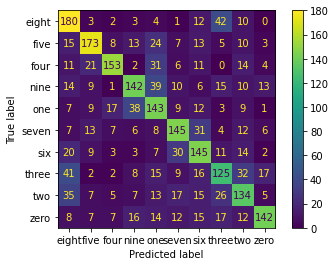

In [164]:
# Naive Bayes gaussiano para datos reducidos
gnb2 = GaussianNB()
y_pred_pca = gnb2.fit(train_x, y_train).predict(test_x)
plot_confusion_matrix(gnb2, test_x, y_test)
print(classification_report(y_test,y_pred_pca))

Mejora la accuracy después del PCA

              precision    recall  f1-score   support

       eight       0.63      0.60      0.61       257
        five       0.48      0.54      0.51       271
        four       0.68      0.50      0.58       253
        nine       0.58      0.49      0.53       259
         one       0.48      0.36      0.41       248
       seven       0.47      0.43      0.45       239
         six       0.38      0.71      0.49       244
       three       0.49      0.32      0.39       267
         two       0.38      0.38      0.38       264
        zero       0.43      0.53      0.48       250

    accuracy                           0.48      2552
   macro avg       0.50      0.48      0.48      2552
weighted avg       0.50      0.48      0.48      2552



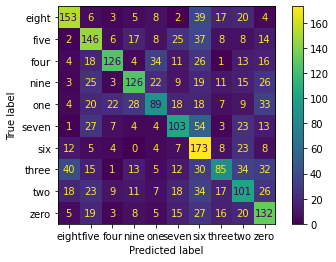

In [165]:
# Naive Bayes likelihood Bernoulli
berni = BernoulliNB ()
y_pred_ber = berni.fit(X_train, y_train).predict(X_test)

plot_confusion_matrix(berni, X_test, y_test)
print(classification_report(y_test,y_pred_ber))

In [166]:
# Ahora el naive bayes manual (sin PCA)

# Distro normal
def prob_standard_normal(x):
  return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
def prob_normal(x,mean,std):
  return prob_standard_normal((x-mean)/std)/std

# funcion que fitea gaussianas para cada clase
def fit_gaussiannb(dataset):
  priors = dataset['digit'].value_counts(normalize=True)
  means = dataset.groupby('digit').mean()
  stds = dataset.groupby('digit').std()
  return priors,means,stds

In [167]:
# funcion que calcula el likelihood
def get_likelihoods(x,means,stds):
  features = means.columns
  target_names = means.index
  likelihoods = []
  for target in target_names:
    likelihood_target = 1
    for i,feat in enumerate(features):
      std = stds[feat].loc[target]
      mean = means[feat].loc[target]
      likelihood_target = likelihood_target*prob_normal(x[i],mean,std)
    likelihoods.append(likelihood_target)
  return likelihoods, target_names

In [168]:
# posteriors y prediccion

def get_posteriors(x,means,stds,priors):
  likelihoods, target_names = get_likelihoods(x,means,stds)
  posteriors = likelihoods*priors
  return posteriors, target_names

def predict(x,means,stds,priors):
  posteriors, target_names = get_posteriors(x,means,stds,priors)
  return target_names[np.argmax(posteriors)]

In [193]:
# recuperando el data frame con digit porque asi lo pide fit_gaussiannb (para los datos de entrenamiento)
train_set = df_train.drop(['filename','audio_name','split'],axis=1)

# Estandarizado
scaler = StandardScaler()
train_set.iloc[:,:-1] = scaler.fit_transform(train_set.iloc[:,:-1])

priors,means,stds = fit_gaussiannb(train_set)
y_pred_man = [predict(x,means,stds,priors) for x in X_test]


In [196]:
print(classification_report(y_test,y_pred_man))

              precision    recall  f1-score   support

       eight       0.62      0.60      0.61       257
        five       0.58      0.58      0.58       271
        four       0.69      0.57      0.62       253
        nine       0.60      0.47      0.53       259
         one       0.42      0.47      0.44       248
       seven       0.53      0.50      0.52       239
         six       0.47      0.64      0.54       244
       three       0.53      0.49      0.51       267
         two       0.41      0.50      0.45       264
        zero       0.57      0.50      0.53       250

    accuracy                           0.53      2552
   macro avg       0.54      0.53      0.53      2552
weighted avg       0.54      0.53      0.53      2552



Text(33.0, 0.5, 'True label')

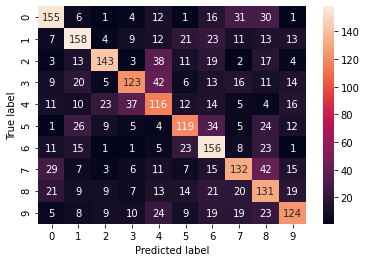

In [197]:
# matriz de confusion

sns.heatmap(confusion_matrix(y_test,y_pred_man),annot=True,fmt='d',annot_kws={"size": 10},xticklabels=1, yticklabels=1)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [259]:
# Manual con PCA

pca_man = PCA(0.95)
principalComponents = pca_man.fit_transform(train_set.iloc[:,:-1])

# proyecciones
train_set_pca = pca_man.transform(train_set.iloc[:,:-1])
test_x = pca_man.transform(X_test)

aux = train_set.iloc[:,-1].values # la columna digit
df_pca_train = pd.DataFrame(np.column_stack((train_set_pca,aux)))
df_pca_train.rename(columns={df_pca_train.shape[1]-1:'digit'}, inplace=True)
#df_pca_train.dtypes

#el dataframe quedo con todas los datos como objetos, esta linea es para volverlos numericos
df_pca_train[[i for i in range(53)]] = df_pca_train[[i for i in range(53)]].apply(pd.to_numeric)
#df_pca_train.dtypes

priors,means,stds = fit_gaussiannb(df_pca_train)

In [260]:
y_pred_man_pca = [predict(x,means,stds,priors) for x in test_x]

In [262]:
print(classification_report(y_test,y_pred_man_pca))

              precision    recall  f1-score   support

       eight       0.53      0.70      0.60       257
        five       0.68      0.64      0.66       271
        four       0.74      0.60      0.67       253
        nine       0.59      0.55      0.57       259
         one       0.48      0.58      0.52       248
       seven       0.59      0.60      0.60       239
         six       0.52      0.59      0.55       244
       three       0.50      0.47      0.48       267
         two       0.52      0.50      0.51       264
        zero       0.73      0.56      0.64       250

    accuracy                           0.58      2552
   macro avg       0.59      0.58      0.58      2552
weighted avg       0.59      0.58      0.58      2552



Text(33.0, 0.5, 'True label')

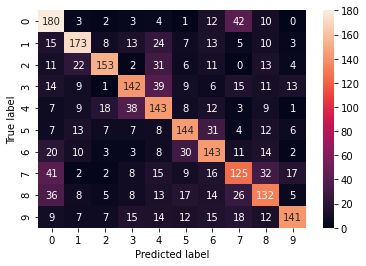

In [264]:
# matriz de confusion

sns.heatmap(confusion_matrix(y_test,y_pred_man_pca),annot=True,fmt='d',annot_kws={"size": 10},xticklabels=1, yticklabels=1)
plt.xlabel('Predicted label')
plt.ylabel('True label')